In [1]:
import pickle
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

# **Preprocess & Feature Engineering**

1. In the original data set, there are 13 attributes found, which are 'Order ID', 'Product Center', 'Product Sub Center', 'Order Product Quantity', 'Customer Expected Delivery Date', 'Delivery Priority Code', 'Product Shipping Point', 'Product Supplier', 'Customer Name', 'Order Type', 'Product ID', 'Product Type', 'Order Create Date' and 1 label used for regression - 'Delivery Time (days)'. 

2. Before moving on to the model training, it is important to preprocess the data set and perform feature engineering to extract the utmost from the datset. The following few steps are executed:

    * **Step 1** - The null item is first identified from the data set. From the dataset, it is noticed that there are samples without the label and the corresponding samples are not useful and removed from the dataset. Besides, there are also null item found in attribute 'Order ID' which is filled with '0' for ease of processig in the later steps.
    
    * **Step 2** - Exploratory data analysis (EDA) is performed on the categorical attributes, which are 'Product Center', 'Product Sub Center', 'Delivery Priority Code', 'Product Shipping Point', 'Product Supplier', 'Order Type', and 'Product Type'. The unique elements of each categorical attribute is first identified and it is found that there is only 1 element in attribute 'Product Center' and thus it is relieved from EDA. From the EDA, the attributes 'Product Sub Center' and 'Order Type' can be removed since they are not important factor affecting the delivery time (days). EDA is an important step to remove redundant attributes with visualization which helps in prevent curse of dimensionality.
    
    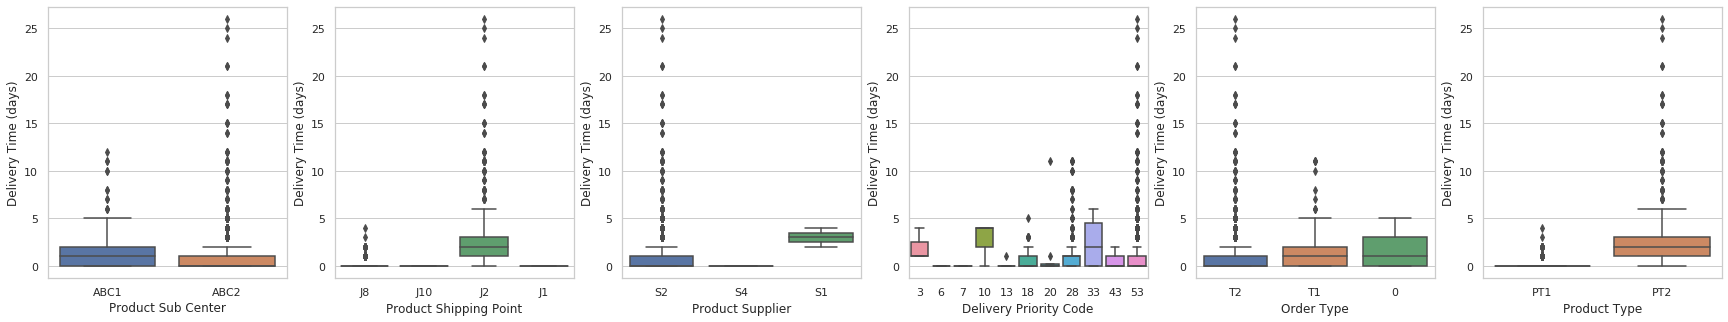
    
    * **Step 3** - From the dataset, there are two datetime attributes available - 'Customer Expected Delivery Date' and 'Order Create Date'. The attribute 'Customer Expected Delivery Date' is deemed not useful since the expectation does not affect the actual delivery time. In the other hand, the attribute 'Order Create Date' is important since the schedule of delivery only starts after the order is created. To extract information from the attribute, the feature engineering is performed and the new attributes 'Month', 'Day' and 'Weekend' are created as tt is speculated that there might be peak period during certain month, day or on weekend. 
    
    * **Step 4** - The unwanted attributes are now removed from the dataset to prevent curse of dimensionality.
    
    * **Step 5** - The categorical attributes are one-hot encoded and the first column of each categorical attribute is removed to prevent possible problem arises from the multicollinearity.

### Step 1 - Identify and handle the null item

In [2]:
df = pd.read_excel('data_train.xlsx')
df.head()

,Order ID,Product Center,Product Sub Center,Order Product Quantity,Customer Expected Delivery Date,Delivery Priority Code,Product Shipping Point,Product Supplier,Customer Name,Order Type,Product ID,Product Type,Order Create Date,Delivery Time (days)
0,OD1,ABC,ABC1,11,2018-10-15,28,J8,S2,n0,T2,P0,PT1,2018-10-15,0.0
1,OD2,ABC,ABC1,3,2018-10-23,28,J10,S2,n1,T2,P1,PT1,2018-10-23,0.0
2,OD3,ABC,ABC1,4,2018-10-23,18,J8,S2,n1,T2,P2,PT1,2018-10-23,0.0
3,OD4,ABC,ABC1,5,2018-10-20,18,J8,S2,n2,T2,P3,PT1,2018-10-20,1.0
4,OD5,ABC,ABC1,3,2018-10-23,18,J8,S2,n3,T2,P0,PT1,2018-10-23,0.0


In [3]:
# Check for any null item
np.sum(df.isnull())

Order ID                            0
Product Center                      0
Product Sub Center                  0
Order Product Quantity              0
Customer Expected Delivery Date     0
Delivery Priority Code              0
Product Shipping Point              0
Product Supplier                    0
Customer Name                       0
Order Type                         41
Product ID                          0
Product Type                        0
Order Create Date                   0
Delivery Time (days)               67
dtype: int64

In [4]:
# Remove the samples without the labels
idx_null = np.where(df['Delivery Time (days)'].isnull()==1)[0]
df.drop(idx_null, axis=0, inplace=True)

# Fill null item with '0' for attribute 'Order Type'
df.fillna('0', inplace=True)

# Reset index
df.reset_index(drop=True, inplace=True)

In [5]:
# All the null items have been handled
np.sum(df.isnull())

Order ID                           0
Product Center                     0
Product Sub Center                 0
Order Product Quantity             0
Customer Expected Delivery Date    0
Delivery Priority Code             0
Product Shipping Point             0
Product Supplier                   0
Customer Name                      0
Order Type                         0
Product ID                         0
Product Type                       0
Order Create Date                  0
Delivery Time (days)               0
dtype: int64

### Step 2 - Perform exploratory data analysis (EDA) on the categorical attributes

In [6]:
# Check the unique elements in all categorical attributes
# From the unique elements found, product center can be removed since there is one 1 element
# Proceed to perform EDA on the remaining categorical attributes

columns_categorical = ['Product Center', 'Product Sub Center',
                       'Delivery Priority Code', 'Product Shipping Point', 
                       'Product Supplier', 'Order Type', 'Product Type']

for column in columns_categorical:
    num_unique = len(np.unique(df[column]))
    print ('Number of unique elements in attribute {} - {}'.format(column, num_unique))

Number of unique elements in attribute Product Center - 1
Number of unique elements in attribute Product Sub Center - 2
Number of unique elements in attribute Delivery Priority Code - 11
Number of unique elements in attribute Product Shipping Point - 4
Number of unique elements in attribute Product Supplier - 3
Number of unique elements in attribute Order Type - 3
Number of unique elements in attribute Product Type - 2


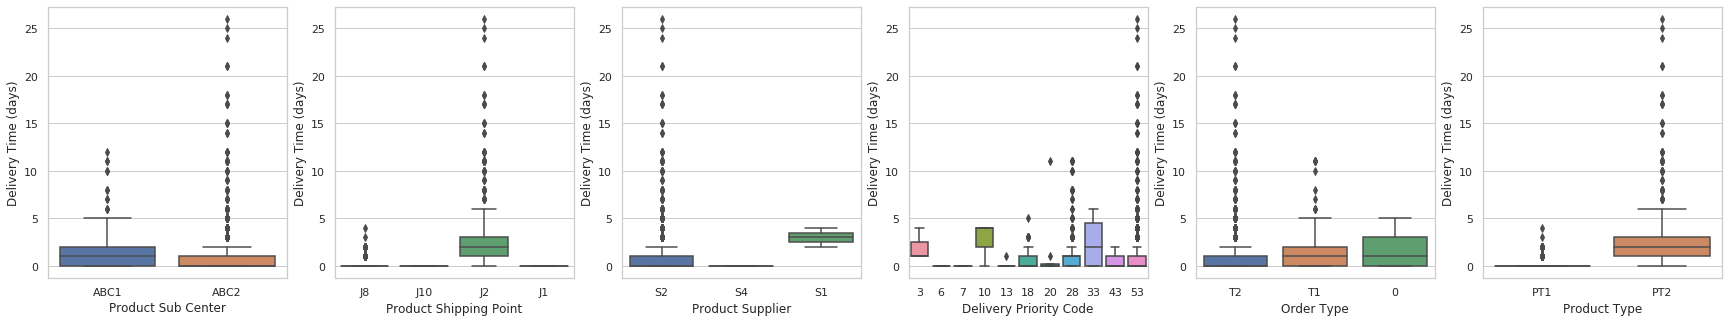

In [7]:
# From the EDA, the attributes 'Product Sub Center' and 'Order Type' can be removed
# Since they are not important factor affecting the delivery time (days)

columns_to_check = ['Product Sub Center', 'Product Shipping Point', 'Product Supplier', 
                    'Delivery Priority Code', 'Order Type', 'Product Type']

fig, ax = plt.subplots(1, 6, figsize=(30, 5))
for i, column in enumerate(columns_to_check):
    sns.boxplot(x=column, y='Delivery Time (days)', data=df, ax=ax[i])
plt.show()

### Step 3 - Feature engineering using the order create date timestamp

In [8]:
df['Month'] = df['Order Create Date'].apply(lambda x: x.month)
df['Day'] = df['Order Create Date'].apply(lambda x: x.day)
df['Weekend'] = df['Order Create Date'].apply(lambda x: 1 if x.weekday() >=5 else 0)

### Step 4 - Remove the unwanted attributes

In [9]:
columns_to_remove = ['Customer Expected Delivery Date', 'Order ID', 'Product Center', 
                     'Product Sub Center', 'Customer Name', 'Order Type', 
                     'Order Create Date', 'Product ID']

In [10]:
df.drop(columns_to_remove, axis=1, inplace=True)
df.head()

,Order Product Quantity,Delivery Priority Code,Product Shipping Point,Product Supplier,Product Type,Delivery Time (days),Month,Day,Weekend
0,11,28,J8,S2,PT1,0.0,10,15,0
1,3,28,J10,S2,PT1,0.0,10,23,0
2,4,18,J8,S2,PT1,0.0,10,23,0
3,5,18,J8,S2,PT1,1.0,10,20,1
4,3,18,J8,S2,PT1,0.0,10,23,0


### Step 5 - Create dummy variable for categorical attributes

In [11]:
columns_categorical = ['Delivery Priority Code', 'Product Shipping Point', 
                       'Product Supplier', 'Product Type', 'Month', 
                       'Day', 'Weekend']

In [12]:
# Drop first to remove the possible multicollinearity problem
df = pd.get_dummies(df, columns=columns_categorical, drop_first=True)
df.head()

,Order Product Quantity,Delivery Time (days),Delivery Priority Code_6,Delivery Priority Code_7,Delivery Priority Code_10,Delivery Priority Code_13,Delivery Priority Code_18,Delivery Priority Code_20,Delivery Priority Code_28,Delivery Priority Code_33,...,Day_23,Day_24,Day_25,Day_26,Day_27,Day_28,Day_29,Day_30,Day_31,Weekend_1
0,11,0.0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,3,0.0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,4,0.0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,5,1.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3,0.0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


# **Feature Selection**

1. With the preprocessed data set, feature selection is executed to identify the truly important feature. In this project, the ensembled tree method - gradient boosting is used to study the importance of each feature. Huber loss is selected in the gradient boosting as it is found from EDA that there are numbers of possible outlier; as a combination of mean square error and mean aboslute error, huber loss can outperform in such case. Also note that, the scaling is not performed since the performance of tree based machine learning method is independent of the scaling. The top **25** features are selected. 

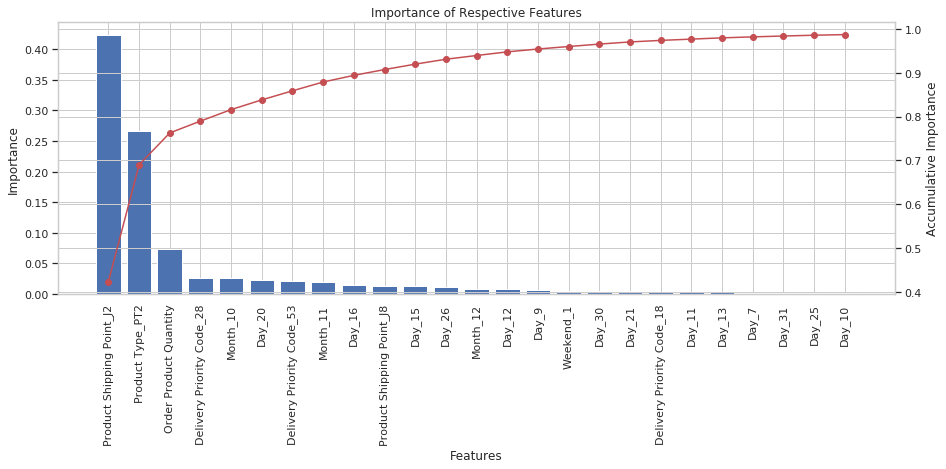

2. It is noticed that the attributes 1) 'Product Shipping Point', 2) 'Product Type', 3) 'Order Product Quantity', 4) 'Delivery Priority Code' make up up to 80% of the importance. It can be explained rationally - 1) the location of shipping point matters since it will take longer time to travel out from a remote area; 2) different type of product might take different time to produce; 3) the larger quantity order, the more time needed to produce; 4) the higher the priority the faster the delivery

In [13]:
from sklearn.ensemble import GradientBoostingRegressor 

In [14]:
y = df['Delivery Time (days)']
x = df.drop('Delivery Time (days)', axis=1, inplace=False)

GBR = GradientBoostingRegressor(loss = "huber", learning_rate = 0.1, n_estimators = 100, 
                               subsample = 1.0, max_features = 1.0, min_samples_split = 2, 
                               min_samples_leaf = 1, verbose = 1, validation_fraction=0.1)

print ('Training starts \n')
GBR.fit(x.values, y)
print ('\n Training completes')

Training starts 

      Iter       Train Loss   Remaining Time 
         1           1.8280            0.40s
         2           1.6370            0.41s
         3           1.4932            0.39s
         4           1.3677            0.38s
         5           1.2548            0.38s
         6           1.1691            0.37s
         7           1.0894            0.36s
         8           1.0321            0.35s
         9           0.9731            0.35s
        10           0.9337            0.36s
        20           0.7689            0.31s
        30           0.7617            0.24s
        40           0.7122            0.20s
        50           0.6873            0.16s
        60           0.6666            0.12s
        70           0.6470            0.09s
        80           0.6136            0.07s
        90           0.5914            0.03s
       100           0.5877            0.00s

 Training completes


In [15]:
def plot_feature_importance(model, features):
    
    # Select the top 25 features
    num_features = 25
    importance = model.feature_importances_/sum(model.feature_importances_)
    idx = np.argsort(importance)[::-1][:num_features]

    fig, ax1 = plt.subplots(figsize=(15, 5))

    # Primary axis
    ax1.bar(x = np.arange(0, num_features), height = importance[idx])
    ax1.set_xticks(ticks = np.arange(0, num_features))
    ax1.set_xticklabels(features[idx], rotation = 90) #, rotation_mode="anchor")
    ax1.set_xlabel("Features")
    ax1.set_ylabel("Importance")
    ax1.set_title('Importance of Respective Features')

    # Secondary axis
    ax2 = ax1.twinx()
    ax2.plot(np.cumsum(importance[idx]), 'ro-')
    ax2.set_ylabel("Accumulative Importance")
    plt.show()

    return features[idx]

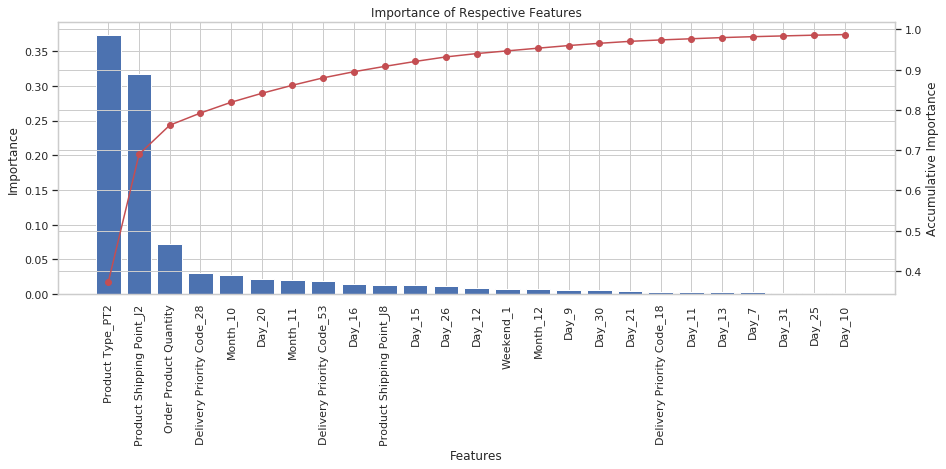

In [16]:
selected_features = plot_feature_importance(GBR, x.columns)

# **Model Training with Quantile Loss**

1. In the project, there are 2 objectives to be achieved with the data science model - 1) the accurate estimation of delivery time; 2) the prediction of delivery time being less than actual delivery time must be avoided to prevent delayed delivery and lead to customer dissatisfaction. 

2. In view of the objective functions, a **3 layer artificial neural network based regression model** is selected due to the ease of modifying the loss function for training. In order to minimize the customer dissatisfaction, a **quantile loss** as depicted in image below is deployed to ensure that most of the prediction of delivery time is always higher than the actual delivery time and therefore lower the delayed delivery and the customer dissatification. For instance, 95% quantile implies that the model will try its best effort to ensure 95% of the time, the prediction value is always higher than the actual value. 

$quantile loss = max(quantile * (y_{true} - y_{pred}), (quantile - 1) * (y_{true} - y_{pred}))$
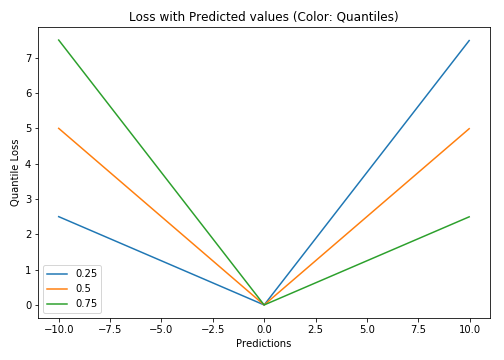

3. Nonetheless, it is a multi-objective problem, an appropriate amount of attention shall be paid to the prediction accuracy. Thus, the performance of the model with different values of quantile are evaluated with 2 proposed metrics - 1) the mean absolute error of the delivery time; 2) the percentage of delayed delivery. The metrics are calculated as follows:

$MeanAbsoluteError = abs(y_{true} - y_{pred})$

$PercentageDelayedDelivery = sum((y_{true} - y_{pred}) < 0) / TotalNumberOfSamples$

4. From the recorded result, a pareto front is plotted and it is found that quantile value ranging from **75% to 85%** returns the best balanced resut. In multi-objective problem, the pareto optimality can only be achieved where no individual or preference criterion can be better off without making at least one individual or preference criterion worse off. In the project, mean absolute error and percentage of delayed delivery are traded off across different quantile values. 

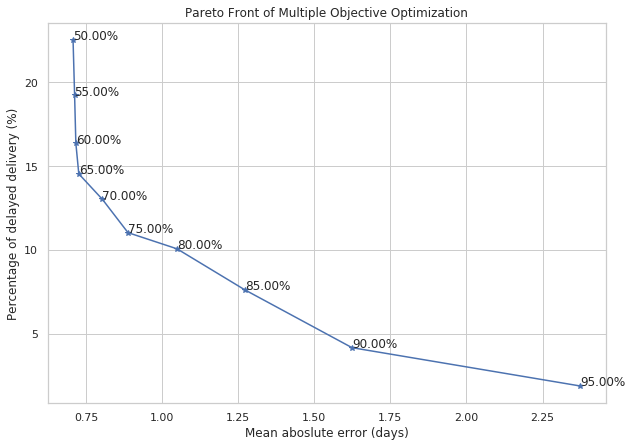

5. In addition, it is worth noting that the model with 50% quantile-loss is equivalent to model with mean absolute error loss. It implies that if the model is trained with the mean absolute error loss function, the percentage of delayed delivery can be as high as 22.5%. 

6. In conclusion, the quantile value should be chosen carefully and the choice of the quantile value is very much dependent on the objective to be achieved.

7. Besides, if the model is to be updated with the new datasets, the number of layers trainable depending on the size of the dataset. If the dataset is small, the first two layers are non-trainable, it is to make the model generalized enough to capture patterns across different small dataset but also finetuned to the most up-to-date dataset. If the dataset is large, all the layers are trainable since the large dataset might contain pattern that has not been seen by the model before. 

### Standardization of numerical features

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
# Standardization of delivery time and order product quantity
quantity_scaler = StandardScaler( with_mean=True, with_std=True)
deliverytime_scaler = StandardScaler( with_mean=True, with_std=True) 

x_categorical = x[selected_features].drop('Order Product Quantity', axis=1, inplace=False).values
x_numerical = x['Order Product Quantity'].values
x_numerical = quantity_scaler.fit_transform(np.expand_dims(x_numerical, axis=1))

x_train = np.concatenate((x_categorical, x_numerical), axis=1)
y_train = deliverytime_scaler.fit_transform(np.expand_dims(y, axis=1))

### ANN regressor model

In [19]:
# Create ANN model with quantile loss
import h5py
import numpy as np
import tensorflow as tf
from sklearn.metrics import mean_absolute_error as MAE

# Create ANN model with quantile loss

class ANNRegressor_model():
    def __init__(self, units, num_features, quantile, file_dir,
               epochs, batch_size, deliverytime_scaler):
        self.units=units
        self.num_features = num_features
        self.quantile = quantile
        self.best_weights_dir = file_dir + 'ANNRegressor_{:.2f}quantile.h5py'.format(quantile)
        self.epochs = epochs
        self.batch_size = batch_size
        self.deliverytime_scaler = deliverytime_scaler
        self.wholenetwork_retrain_samplesize = 10000
        self.partnetwork_retrain_numlayer = 2
        self.create_model()

    # Pinball loss/ quantile score for multiple or single quantile
    def tilted_loss(self, y_true, y_pred):
        y_true = tf.keras.backend.cast(y_true, "float32")
        y_pred = tf.keras.backend.cast(y_pred, "float32")
        e = y_true - y_pred
        # find the average loss of quantile
        return tf.keras.backend.mean(tf.keras.backend.maximum(self.quantile * e, 
                                                      (self.quantile - 1) * e), axis = 0)

    def create_model(self):
        input_ = tf.keras.Input(shape=(self.num_features,))
        x = tf.keras.layers.Dense(self.units, activation='relu')(input_)
        x = tf.keras.layers.Dense(self.units, activation='relu')(x)
        x = tf.keras.layers.Dense(self.units, activation='relu')(x)
        output = tf.keras.layers.Dense(1, activation = "linear")(x)
        self.model = tf.keras.Model(inputs=[input_], outputs=[output])
        #self.model.summary()

    def fit_model(self, x_train, y_train):
        # Compile the model
        self.model.compile(loss=self.tilted_loss, optimizer='adam')
        
        # Set callbacks for training
        modelcheckpoint = tf.keras.callbacks.ModelCheckpoint(self.best_weights_dir, 
                                                             monitor = 'val_loss',
                                                             save_best_only = True, 
                                                             save_weights_only = True,
                                                             verbose = 0)
        earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)
        callbacks = [modelcheckpoint, earlystopping]
        self.history = self.model.fit(x_train, y_train, callbacks = callbacks, 
                                      epochs = self.epochs, batch_size = self.batch_size, 
                                      verbose = 0, validation_split=0.15)
  
    def plot_result(self):
        plt.figure(figsize=(15, 5))
        plt.plot(self.history.history["loss"], "-*", label="training")
        plt.plot(self.history.history["val_loss"], "-o", label="validation")
        plt.xlabel("Epoch")
        plt.ylabel("Penalized Loss")
        plt.legend()
        plt.show()
    
    # Predict based on the input features and inverse transform
    # Return rounded unscaled prediction time in days
    def predict(self, x_test):
        self.model.load_weights(self.best_weights_dir)
        y_pred = self.model.predict(x_test, batch_size=self.batch_size)
        return  np.round(self.deliverytime_scaler.inverse_transform(y_pred))

    def evaluate(self, x_test, y_test, plot=False):
        y_test_pred = self.predict(x_test) # rounded unscaled prediction time in days
        y_test = self.deliverytime_scaler.inverse_transform(y_test)

        if plot:
            # Plot prediction against actual
            plt.figure(figsize=(15, 5))
            plt.plot(y_test_pred, label='prediction')
            plt.plot(y_test, label='actual')
            plt.title('Prediction of Delivery Time (days) with {:.2f} quantile'.format(self.quantile))
            plt.ylabel('Delivery Time (days)')
            plt.xlabel('Samples')
            plt.legend()
            plt.show()

        # Evaluate the performance
        mae = MAE(y_test, y_test_pred)
        percentage_delayed_delivery = np.sum(y_test_pred < y_test) / len(y_test) * 100

        print ('The mean absolute error: {:.2f} days'.format(mae))
        print ('The percentage of delayed delivery: {:.2f}%'.format(percentage_delayed_delivery))

        return mae, percentage_delayed_delivery
    
    # Only set the last layer to be trainable when the dataset is small
    # Retrain the entire network when the dataset is large
    # Since the large dataset might contain much information and pattern
    # which is completely different from previous training set
    # Set trainable/ non-trainable before compile
    def refit_model(self, x_train, y_train):
        if len(x_train) < self.wholenetwork_retrain_samplesize:
            for i, layer in enumerate(self.model.layers[:self.partnetwork_retrain_numlayer]):
                layer.trainable = False
                print ('Layer {} set non-trainable'.format(i))
        
        self.model.compile(loss=self.tilted_loss, optimizer='adam')
        modelcheckpoint = tf.keras.callbacks.ModelCheckpoint(self.best_weights_dir, 
                                                             monitor = 'val_loss',
                                                             save_best_only = True, 
                                                             save_weights_only = True,
                                                             verbose = 0)
        earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                         patience=20)
        callbacks = [modelcheckpoint, earlystopping]
        self.history = self.model.fit(x_train, y_train, callbacks = callbacks, 
                                      epochs = self.epochs, batch_size = self.batch_size, 
                                      verbose = 0, validation_split=0.15)

### Examine performance of model with 95% quantile

In [20]:
units = 32
num_features = len(selected_features)
file_dir = ''
epochs = 30
batch_size = 64

Training & evaluating model with 0.95 quantile


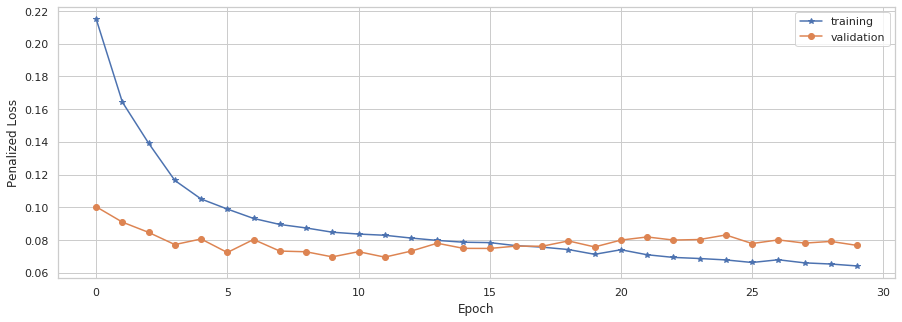

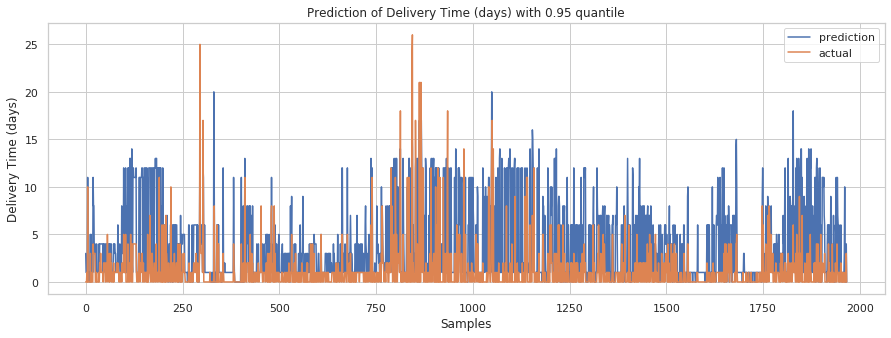

The mean absolute error: 2.57 days
The percentage of delayed delivery: 1.98%


In [21]:
# Notice from the result, the model has very low percentage of delayed delivery
# But with a high mean absolute error

quantile = 0.95

print ('Training & evaluating model with {:.2f} quantile'.format(quantile))
model = ANNRegressor_model(units, num_features, quantile, file_dir, 
                           epochs, batch_size, deliverytime_scaler)
model.fit_model(x_train, y_train)
model.plot_result()
mae, percentage_delayed_delivery = model.evaluate(x_train, y_train, True)

### Optimize the quantile value and find the optimal pareto front solution

In [28]:
# Examine the performance of the model with different quantile value
# Find the best solution from the pareto front
# Note that the model with 50% quantile loss is equal to model with mean absolute error loss

quantiles = np.arange(0.5, 1, 0.05)

maes = []
percentages_delayed_delivery = []

for quantile in quantiles:
    print ('Training & evaluating model with {:.2f} quantile'.format(quantile))
    model = ANNRegressor_model(units, num_features, quantile, file_dir, 
                               epochs, batch_size, deliverytime_scaler)
    model.fit_model(x_train, y_train)
    mae, percentage_delayed_delivery = model.evaluate(x_train, y_train, False)
    maes.append(mae)
    percentages_delayed_delivery.append(percentage_delayed_delivery)
    print ('\n')

Training & evaluating model with 0.50 quantile
The mean absolute error: 0.71 days
The percentage of delayed delivery: 22.52%


Training & evaluating model with 0.55 quantile
The mean absolute error: 0.71 days
The percentage of delayed delivery: 19.22%


Training & evaluating model with 0.60 quantile
The mean absolute error: 0.72 days
The percentage of delayed delivery: 16.37%


Training & evaluating model with 0.65 quantile
The mean absolute error: 0.73 days
The percentage of delayed delivery: 14.54%


Training & evaluating model with 0.70 quantile
The mean absolute error: 0.80 days
The percentage of delayed delivery: 13.01%


Training & evaluating model with 0.75 quantile
The mean absolute error: 0.89 days
The percentage of delayed delivery: 11.03%


Training & evaluating model with 0.80 quantile
The mean absolute error: 1.05 days
The percentage of delayed delivery: 10.07%


Training & evaluating model with 0.85 quantile
The mean absolute error: 1.27 days
The percentage of delayed del

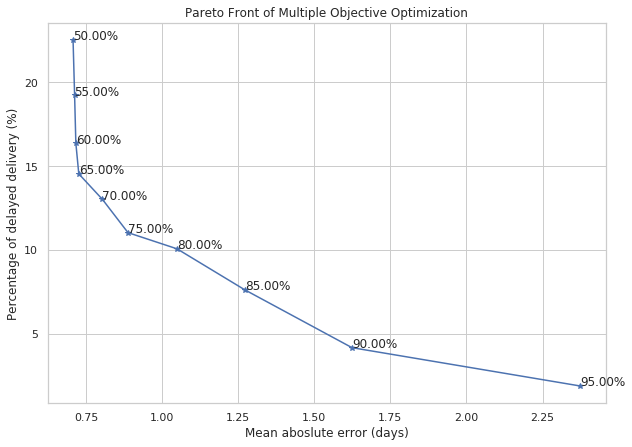

In [29]:
# Pareto optimal solution of multiple objectives

fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(maes, percentages_delayed_delivery, '*-')
ax.set_xlabel('Mean aboslute error (days)')
ax.set_ylabel('Percentage of delayed delivery (%)')
ax.set_title('Pareto Front of Multiple Objective Optimization')
for txt, x, y in zip(quantiles, maes, percentages_delayed_delivery):
    ax.annotate('{:.2f}%'.format(txt*100), (x, y))
plt.show()

# Save training parameter

In [30]:
# Save the selected important features/ attributes
with open('selected_features.pkl', 'wb') as file:
    pickle.dump(selected_features, file)

# Save the scalers for respective attributes and label
with open('quantity_scaler.pkl', 'wb') as file:
    pickle.dump(quantity_scaler, file)

with open('deliverytime_scaler.pkl', 'wb') as file:
    pickle.dump(deliverytime_scaler, file)

In [31]:
# Save the model parameter

units = 32
num_features = len(selected_features)
file_dir = ''
epochs = 30
batch_size = 64
quantile = 0.8

with open('parameters.pkl', 'wb') as file:
    pickle.dump([units, num_features, file_dir, epochs, batch_size, quantile], file)